In [27]:
import numpy as np
import pathlib as pl
import os
import pandas as pd
import warnings
warnings.simplefilter("ignore")
from copy import copy
import analysis.retroBO_analysis_functions as fns
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl

# mpl.style.use('mystyle.mplstyle')

inch_conversion = 1/25.4
page_width = 142.4 *inch_conversion
column_width = 67.2* inch_conversion

# Notebook for Plotting Retrospective Bayesian Optimisation Results for Unpenalized Case


This notebook is for plotting the results of the retrospective Bayesian optimisation on the PCR data.

First specify the results to be plotted.

In [28]:
param_name = 'r' # which parameters
save=False
params = ['r']

# random_if_none=False
starting_points = ['centre', '0_point_start'] #, '0_point_start', 'centre',
learning_types = ['learning_many', 'learning_1'] #'learning many',

Load the results

In [29]:
res_dfs = {}
results_path = pl.Path(os.getcwd()) / 'results' / 'unpenalized_bayes_opt_diff_inits'

for key in ['centre_learning_many', '0_point_start_learning_many']:
    res_dfs[key] = pd.read_csv(results_path /f'unpenalized_bayes_opt_{key}_r_new.csv', index_col=0)


In [30]:
new_res_dfs = {}
for key, df in res_dfs.items():
    initial_surfaces = df['init_surfaces'].unique()
    print(initial_surfaces)
    for surface in initial_surfaces:
        new_res_dfs[f'{key}_{surface}'] = df[df['init_surfaces'] == surface]

['many_FP004-RP004x-Probe_FP002-RP002x-Probe'
 'many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen']
['many_FP004-RP004x-Probe_FP002-RP002x-Probe'
 'many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen']


In [31]:
res_dfs = {}
surface = 'FP004-RP004-EvaGreen_FP002-RP002x-Probe'
results_path = pl.Path(os.getcwd()) / 'results' / 'unpenalized_bayes_opt'
for key in ['centre_learning_many', '0_point_start_learning_many']:
    new_res_dfs[f'{key}_many_{surface}'] = pd.read_csv(results_path /f'bayes_opt_{key}.csv', index_col=0)

In [32]:
print(new_res_dfs.keys())

dict_keys(['centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', '0_point_start_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe'])


In [33]:
df = new_res_dfs[f'0_point_start_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe']

print(df.to_string())
# print(df[(df['iteration'] == 1) & (df['model'] =='lmc')].groupby('seed').mean().to_string())

       Unnamed: 0.1   BP        GC     PrimerPairReporter         r    stzd r      r_mu    r_sig2        r_mu_z  r_sig2_z         m    stzd m      m_mu    m_sig2        m_mu_z  m_sig2_z          EI_z  centre dist  Sequence Name  target r  target r z  target m  target m z    model  iteration   error r  error from target r z  error from target r  error r z       error m  error from target m z  error from target m  error m z  initial_surface  seed                               init_surfaces
32             10.0   36  0.444444  FP001-RP001x-EvaGreen  0.949060  1.374034  0.801477  0.002672  4.632802e-01  0.101743  0.001151 -0.827319  0.008366  0.000011 -1.812753e-02  0.139441  4.347603e-01          NaN  S067_8a718d_α     0.902    1.083622      0.01     0.16508      avg          1  0.147583               0.620341             0.100523   0.910753  7.215096e-03               0.183208             0.001634   0.809192            False     1  many_FP004-RP004x-Probe_FP002-RP002x-Probe
33            

In [34]:
res_dfs = new_res_dfs

In [35]:
print(res_dfs.keys())

dict_keys(['centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', '0_point_start_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe'])


In [36]:
for key, df in res_dfs.items():
    # res_dfs[key] = df[(df['seed'] < 14) & (df['seed'] >0)]
    res_dfs[key] = df[(df['seed'] < 21)  & (df['seed'] >0)]


In [37]:
res_dfs.keys()

dict_keys(['centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', '0_point_start_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe'])

In [38]:
seeds_df = pd.DataFrame(columns=list(res_dfs.keys()),
                        index=res_dfs[f'centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe']['PrimerPairReporter'].unique())

for key, df in res_dfs.items():
    for ppr in df['PrimerPairReporter'].unique():
        df_ = df[df['PrimerPairReporter'] == ppr]
        # counts = df_.value_counts('seed').to_frame()
        seeds_df[key][ppr] = len(df_['seed'].unique())

print(seeds_df)

                      centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe  \
FP001-RP001x-EvaGreen                                                 20                
FP002-RP002x-EvaGreen                                                 20                
FP005-FP001-Probe                                                     20                
RP001x-FP002-Probe                                                    20                
RP002x-FP005-Probe                                                    20                
FP005-FP004-EvaGreen                                                  20                
FP004-RP004-Probe                                                     20                
RP002x-FP002-EvaGreen                                                 20                
FP001-RP004-EvaGreen                                                  20                
FP002-RP004-EvaGreen                                                  20                
FP004-FP005-Probe    

If necessary, see which seeds are missing data:

In [39]:
seeds_df = pd.DataFrame(columns=list(res_dfs.keys()),
                        index=res_dfs[f'centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe']['model'].unique())
for key, df in res_dfs.items():
    for model in df['model'].unique():
        df_ = df[df['model'] == model]
        # counts = df_.value_counts('seed').to_frame()
        seeds_df[key][model] = len(df_['seed'].unique())

print(seeds_df)

        centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe  \
mo_indi                                                 20                
lmc                                                     20                
avg                                                     20                
lvm                                                     20                

        centre_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen  \
mo_indi                                                 20                     
lmc                                                     20                     
avg                                                     20                     
lvm                                                     20                     

        0_point_start_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe  \
mo_indi                                                 20                       
lmc                                                     20 

In [40]:
for key, df in res_dfs.items():
    print(key)
    counts_df = pd.DataFrame(columns=res_dfs[f'centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe']['PrimerPairReporter'].unique())
    for ppr in df['PrimerPairReporter'].unique():
        df_ = df[(df['PrimerPairReporter'] == ppr)  & (df['model'] == 'mo_indi')][['BP', 'GC', 'seed']].drop_duplicates()
        counts = df_.value_counts('seed').to_frame().sort_values(by='seed')
        counts_df[ppr] = df_.value_counts('seed').to_frame().sort_values(by='seed')
        # seeds_df[key][ppr] = len(df_['seed'].unique())
    print(counts_df.T.to_string())

centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe
seed                   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20
FP001-RP001x-EvaGreen  24  21  20  23  20  23  22  20  21  20  24  24  24  24  22  22  24  21  24  22
FP002-RP002x-EvaGreen  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
FP005-FP001-Probe       8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8
RP001x-FP002-Probe     19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19  19
RP002x-FP005-Probe      8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8
FP005-FP004-EvaGreen    8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8
FP004-RP004-Probe      24  21  20  23  20  23  22  20  21  20  25  27  27  28  22  22  24  21  24  22
RP002x-FP002-EvaGreen   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2
FP001-RP004-EvaGre

Calculate the regret

In [41]:

print(params)

['r']


In [42]:
path = pl.Path(os.getcwd())
with open(path / 'data' / 'JG067 sequence targets.csv', "rb") as file:
    targets = pd.read_csv(file)
targets['PrimerPair'] = targets[['FPrimer', 'RPrimer']].agg('-'.join, axis=1)
if pd.__version__ == '1.3.4':
    targets['EvaGreen'] = ((targets['-Strand Label']=='None') & (targets['+Strand Label']=='None'))
else:
    targets['EvaGreen'] = ((targets['-Strand Label'].isna()) & (targets['+Strand Label'].isna()))
targets.loc[targets['EvaGreen'] == True, 'EvaGreen'] = 'EvaGreen'
targets.loc[targets['EvaGreen'] == False, 'EvaGreen'] = 'Probe'
targets['PrimerPairReporter'] = targets[['PrimerPair', 'EvaGreen']].agg('-'.join, axis=1)
targets = targets.drop_duplicates(subset=['PrimerPairReporter'], keep='first')

In [45]:
for name, df in res_dfs.items():
    if 'init_surfaces' not in df.columns:
        df['init_surfaces'] = 'FP004-RP004-EvaGreen_FP002-RP002x-Probe'
    # print(df.head().to_string())
    res_dfs[name] = df  
    # df = df.drop(columns=['Sequence Name', 'init_surfaces'])
    # df = df.groupby(['iteration', 'model', 'seed', 'PrimerPairReporter']).mean().reset_index()

In [46]:
stzd = True
max_iter = 20

if len(params) > 1:
    regret_metric = 'combined regret'
else:
    regret_metric = 'regret r'

# starting_point_names = {'centre':'Centre', '0_point_start':'Model\'s Choice'}
# learning_type_names = {'learning_many':'Learning Many', 'learning_1':'Learning One\nat a Time'}
plot_minmax = True
regrets_all = {}
regret_names = []
for name, df in res_dfs.items():
    best_points = fns.get_best_points(params, df, stzd=stzd, log_t=False)
    print(best_points.to_string())
    regret_df_all = fns.calculate_regret(df, params, best_points, stzd=stzd)
    regret_df_all = regret_df_all[regret_df_all['iteration'] <=max_iter]
    regrets_all[name] = regret_df_all

    index     PrimerPairReporter  Target Rate  min error from targ r
0       0  FP001-RP001x-EvaGreen        0.902               0.111973
1       1  FP002-RP002x-EvaGreen        0.902               0.186254
2       2      FP005-FP001-Probe        0.866               0.089400
3       3     RP001x-FP002-Probe        0.951               0.112784
4       4     RP002x-FP005-Probe        0.866               0.221764
5       5   FP005-FP004-EvaGreen        0.653               0.306645
6       6      FP004-RP004-Probe        0.758               0.004814
7       8  RP002x-FP002-EvaGreen        0.952               0.001193
8       9   FP001-RP004-EvaGreen        1.050               0.050663
9      10   FP002-RP004-EvaGreen        1.050               0.824535
10     12      FP004-FP005-Probe        0.486               0.012564
11     15     RP008x-FP005-Probe        0.806               0.055040
12     16   FP005-FP001-EvaGreen        0.963               0.234304
13     18  RP002x-FP004-EvaGreen  

In [47]:
print(regret_df_all.columns)

Index(['iteration', 'model', 'seed', 'PrimerPairReporter', 'index', 'BP', 'GC',
       'r', 'stzd r', 'r_mu', 'r_sig2', 'r_mu_z', 'r_sig2_z', 'EI_z',
       'target r', 'target r z', 'error r', 'error from target r z',
       'error from target r', 'error r z', 'initial_surface',
       'diff from target r', 'best diff r', 'regret r'],
      dtype='object')


In [48]:

cumulative_regrets = {}
for name, regret_df in regrets_all.items():

    if 'r' in params and 'm' in params:
        regret_names = ['combined regret']
    else:
        regret_names = [f'regret {param}' for param in params]

    # if learning_type == 'learning many':
    #     for seed in regret_df['seed'].unique():
    #         temp_df = regret_df[regret_df['seed'] == seed]
    #         if temp_df['iteration'].max() != max_iter:
    #             regret_df= regret_df[regret_df['seed'] != seed]

    regret_df = regret_df.sort_values('iteration')

    # calculate the cumulative minimum regret and cumulative sum of regret

    for model in regret_df['model'].unique():
        for seed in regret_df['seed'].unique():
            for ppr in regret_df['PrimerPairReporter'].unique():
                for regret_name in regret_names:
                    regret_df.loc[
                        (regret_df['model'] == model) & (regret_df['seed'] == seed) & (
                                    regret_df['PrimerPairReporter'] == ppr), f'{regret_name} cummin'] = \
                        regret_df.loc[(regret_df['model'] == model) & (regret_df['seed'] == seed) & (
                                regret_df['PrimerPairReporter'] == ppr), regret_name].cummin()
                    regret_df.loc[
                        (regret_df['model'] == model) & (regret_df['seed'] == seed) & (
                                    regret_df['PrimerPairReporter'] == ppr), f'{regret_name} cumsum'] = \
                        regret_df.loc[(regret_df['model'] == model) & (regret_df['seed'] == seed) & (
                                regret_df['PrimerPairReporter'] == ppr), f'{regret_name} cummin'].cumsum()
    cumulative_regrets[name] = regret_df


In [49]:
cumulative_regrets.keys()

dict_keys(['centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', '0_point_start_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe'])

In [50]:
regret_metrics = {}
for name, regret_df in cumulative_regrets.items():
    # regret_df = regret_df[regret_df['PrimerPairReporter'].str.contains('EvaGreen')]

    i_max = regret_df['iteration'].max() #.loc[regret_df['model'] =='avg',

    for ppr in regret_df['PrimerPairReporter'].unique():

        ppr_imax = regret_df.loc[regret_df['PrimerPairReporter'] == ppr, 'iteration'].to_numpy().max()
        if ppr_imax == i_max:
            pass
        else:
            extra_rows = pd.concat([regret_df.loc[(regret_df['PrimerPairReporter'] == ppr)
                                            & (regret_df['iteration'] == ppr_imax)]] * int((i_max - ppr_imax)))
            extra_rows = extra_rows.sort_values(['model', 'seed'])
            if ppr_imax < (i_max - 1):
                test = np.arange(ppr_imax + 1, i_max + 1).tolist() * int(len(extra_rows)/(i_max-ppr_imax))
                extra_rows['iteration'] = np.arange(ppr_imax + 1, i_max + 1).tolist() \
                                          * int(len(extra_rows)/(i_max-ppr_imax))
                regret_df = pd.concat([regret_df, extra_rows])
            elif ppr_imax == (i_max - 1):
                extra_rows['iteration'] = i_max
                regret_df = pd.concat([regret_df, extra_rows])
            else:
                pass
    # if 'learning many' in name:    
    df = regret_df.groupby(['model', 'iteration', 'seed']).mean().reset_index()

    df2 = df.groupby(['model', 'iteration']).mean().reset_index()
    df3 = df.groupby(['model', 'iteration']).median().reset_index()
    df4 = df.groupby(['model', 'iteration']).quantile(0.05).reset_index()
    df5 = df.groupby(['model', 'iteration']).quantile(0.95).reset_index()
    metrics = ['mean', 'median', 'min', 'max']

    dfs = [df2, df3, df4, df5]
    for i in range(len(dfs)):
        for col in [f'{regret_name} {met}' for regret_name in regret_names for met in ['cummin', 'cumsum']]:
            dfs[i][f'{metrics[i]} {col}'] = dfs[i][col]
        dfs[i] = dfs[i].drop(
            columns=[f'{regret_name} {met}' for regret_name in regret_names for met in ['cummin', 'cumsum']]
                    + ['seed', 'index'] + regret_names)
    regret_df = dfs[0].merge(dfs[1], on=['model', 'iteration'])
    regret_df = regret_df.merge(dfs[2], on=['model', 'iteration'])
    regret_df = regret_df.merge(dfs[3], on=['model', 'iteration'])

    # else:
    #
    #     # calculate the mean, min, and max of the cumulative minimum regret and cumulative sum of
    #     # regret across all seeds for each primer pair reporter
    #
    #     df4 = regret_df.groupby(['model', 'iteration', 'PrimerPairReporter']).mean().reset_index()
    #     df7 = regret_df.groupby(['model', 'iteration', 'PrimerPairReporter']).median().reset_index()
    #     df5 = regret_df.groupby(['model', 'iteration', 'PrimerPairReporter']).quantile(0.05).reset_index()
    #     df6 = regret_df.groupby(['model', 'iteration', 'PrimerPairReporter']).quantile(0.95).reset_index()
    #
    #     # create new dataframe which combines these metrics
    #
    #     metrics = ['mean', 'min', 'max', 'median']
    #     dfs = [df4, df5, df6, df7]
    #     for i in range(len(dfs)):
    #         for col in [f'{regret_name} {met}' for regret_name in regret_names for met in ['cummin', 'cumsum']]:
    #             dfs[i][f'{metrics[i]} {col}'] = dfs[i][col]
    #         dfs[i] = dfs[i].drop(
    #             columns=[f'{regret_name} {met}' for regret_name in regret_names for met in ['cummin', 'cumsum']]
    #                     + ['seed', 'index'] + regret_names)
    #
    #     regret_df = dfs[0].merge(dfs[1], on=['model', 'iteration', 'PrimerPairReporter'])
    #     regret_df = regret_df.merge(dfs[2], on=['model', 'iteration', 'PrimerPairReporter'])
    #     regret_df = regret_df.merge(dfs[3], on=['model', 'iteration', 'PrimerPairReporter'])

    regret_df = regret_df.groupby(['model', 'iteration']).mean().reset_index()
    regret_metrics[name] = regret_df

In [51]:
print(regret_df.columns.to_list())

['model', 'iteration', 'BP_x', 'GC_x', 'r_x', 'stzd r_x', 'r_mu_x', 'r_sig2_x', 'r_mu_z_x', 'r_sig2_z_x', 'EI_z_x', 'target r_x', 'target r z_x', 'error r_x', 'error from target r z_x', 'error from target r_x', 'error r z_x', 'initial_surface_x', 'diff from target r_x', 'best diff r_x', 'mean regret r cummin', 'mean regret r cumsum', 'BP_y', 'GC_y', 'r_y', 'stzd r_y', 'r_mu_y', 'r_sig2_y', 'r_mu_z_y', 'r_sig2_z_y', 'EI_z_y', 'target r_y', 'target r z_y', 'error r_y', 'error from target r z_y', 'error from target r_y', 'error r z_y', 'initial_surface_y', 'diff from target r_y', 'best diff r_y', 'median regret r cummin', 'median regret r cumsum', 'BP_x', 'GC_x', 'r_x', 'stzd r_x', 'r_mu_x', 'r_sig2_x', 'r_mu_z_x', 'r_sig2_z_x', 'EI_z_x', 'target r_x', 'target r z_x', 'error r_x', 'error from target r z_x', 'error from target r_x', 'error r z_x', 'initial_surface_x', 'diff from target r_x', 'best diff r_x', 'min regret r cummin', 'min regret r cumsum', 'BP_y', 'GC_y', 'r_y', 'stzd r_y', '

In [52]:
for regret_df in regret_metrics.values():
    print(regret_df[f'median {regret_metric} cumsum'].min())

1.0456441365173692
1.0456441365173692
0.39802472601285155
0.23061280072700802
0.5878433329829333
0.4638464487884437


In [53]:
print(res_dfs.keys())

dict_keys(['centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', '0_point_start_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe'])


In [54]:
regret_metrics.keys()

dict_keys(['centre_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', '0_point_start_learning_many_many_FP004-RP004x-Probe_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen', 'centre_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe', '0_point_start_learning_many_many_FP004-RP004-EvaGreen_FP002-RP002x-Probe'])

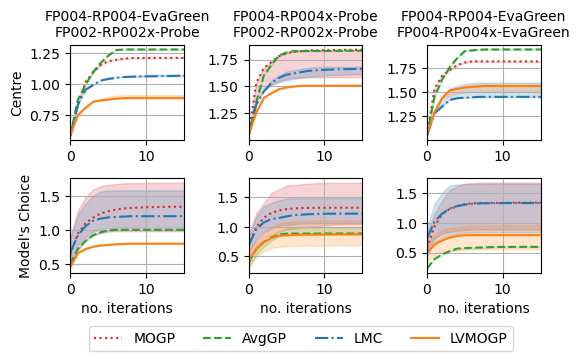

In [55]:
linestyles = {'lmc':'dashdot', 'mo_indi': 'dotted', 'lvm':  'solid' , 'avg': 'dashed' }
def get_colors():
    cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
    cols = ['#253494', '#2c7fb8','#41b6c4',  '#a1dab4']
    colors = {'lmc': cols[0], 'mo_indi': cols[3], 'lvm': cols[1], 'avg': cols[2]}
    return colors

starting_point_names = {'centre':'Centre', '0_point_start':'Model\'s Choice'}
learning_type_names = {'learning many':'Many Surfaces', 'learning 1':'One at a Time'}
labels = {'mo_indi':'MOGP', 'avg':'AvgGP', 'lmc': 'LMC', 'lvm':'LVMOGP'}

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[page_width, page_width*0.6])
colors = fns.get_colors()
plot_minmax=True
starting_point_names = {'centre':'Centre', '0_point_start':'Model\'s Choice'}
learning_type_names = {'learning_many':'Many Surfaces', 'learning_1':'One at a Time'}
initial_surfaces = ['FP004-RP004-EvaGreen_FP002-RP002x-Probe', 'FP004-RP004x-Probe_FP002-RP002x-Probe', 'FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen']
titles = {'FP004-RP004-EvaGreen_FP002-RP002x-Probe':'FP004-RP004-EvaGreen\nFP002-RP002x-Probe', 
          'FP004-RP004x-Probe_FP002-RP002x-Probe':'FP004-RP004x-Probe\nFP002-RP002x-Probe',
            'FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen':'FP004-RP004-EvaGreen\nFP004-RP004x-EvaGreen'}
labels = {'mo_indi':'MOGP', 'avg':'AvgGP', 'lmc': 'LMC', 'lvm':'LVMOGP'}

for i, init_surface in enumerate(initial_surfaces): #, 'learning 1'
    for j, starting_point in enumerate(starting_points):
        name = f'{starting_point}_learning_many_many_{init_surface}'
        regret_df = regret_metrics[name]

        if (starting_point =='0_point_start') & (init_surface in ['FP004-RP004x-Probe_FP002-RP002x-Probe', 'FP004-RP004-EvaGreen_FP004-RP004x-EvaGreen']):
            regret_df['iteration'] = regret_df['iteration'] - 1
        

        for model in ['mo_indi', 'avg', 'lmc', 'lvm']:
            df = regret_df[(regret_df['model'] == model) ].sort_values('iteration')
            if (i==0) & (j==0):
                label = labels[model]
            else:
                label = None
            axs[j, i].plot(df['iteration'], df[f'median {regret_metric} cumsum'], label=label,
                        color=colors[model], linestyle=linestyles[model])
            if plot_minmax:
                
                axs[j, i].fill_between(df['iteration'], df[f'min {regret_metric} cumsum'],
                                    df[f'max {regret_metric} cumsum'],
                                    alpha=0.2, color=colors[model])
        axs[0, i].set_title(f'{titles[init_surface]}', fontsize=10)
        axs[j,0].set_ylabel(starting_point_names[starting_point])
        axs[1,i].set_xlabel('no. iterations')



rows = [f'{row}' for row in starting_point_names.values()]
# for ax, row in zip(axs[:,0], rows):
#     ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
#                 xycoords=ax.yaxis.label, textcoords='offset points',
#                 fontsize=10, ha='right', va='center', rotation=90)
for ax in axs.flatten():
    ax.set_xlim(0, 15)
    ax.grid()

        # plt.suptitle('Cumulative Regret')
        # axs[j, i].legend()

fig.legend(loc="lower center", ncols=4,
               bbox_to_anchor=(0.53, -0.08))

plt.tight_layout()

plt.savefig(pl.Path(os.getcwd()) / f'analysis/plots/retroBO_cumulative_regret_all_diff_inits_{param_name}.pdf', bbox_inches='tight')
# plt.savefig(f'plots/retroBO_cumulative_regret_all_{param_name}.svg', bbox_inches='tight')
